In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stylia as st

datapath = "../data"
outpath = "../output"

In [4]:
datasets = ["coad_drugs", "arv_drugs", "mtb_drugs"]
dfs = []
for d in datasets:
    df = pd.read_csv(os.path.join(outpath, "results", f"{d}.csv"))
    indication = d.split("-")[0]
    df["indication"] = indication
    dfs += [df]

df = pd.concat(dfs)
df.shape

(115, 8)

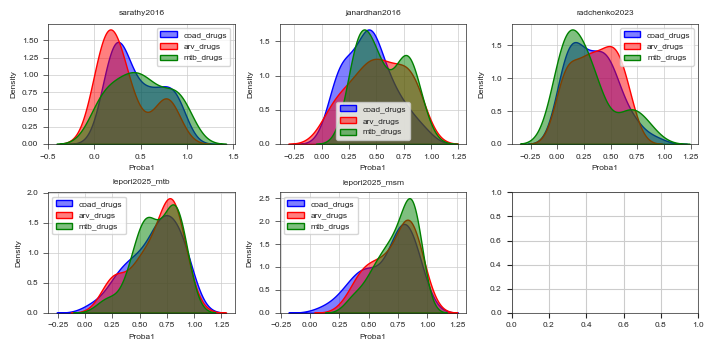

In [22]:
models = ["sarathy2016", "janardhan2016", "radchenko2023", "lepori2025_mtb", "lepori2025_msm"]
colors = {"coad_drugs": "blue", "arv_drugs": "red", "mtb_drugs": "green"}

fig, axs=st.create_figure(2,3)
for m in models:
    ax = axs.next()
    for d in datasets:
        df_ = df[df["indication"]==d]
        sns.kdeplot(ax=ax, x = df_[m].tolist(), color=colors[d], label=d, alpha=0.5, fill=True)
    ax.set_title(f"{m}")  
    ax.set_xlabel("Proba1")
    ax.set_ylabel("Density")
    ax.legend()
plt.tight_layout()
st.save_figure(os.path.join(outpath, "plots", "prediction_distribution.png"))